In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw7.ipynb")

# Homework 7: Studying Employee Attrition With K-Means

Name: Matthew DeSantis

Student ID: 488103

Collaborators:


## Instructions

In this homework, we will be exploring a more realistic application of clustering. It might be helpful to review **Lab 7 (K-Means Clustering)** first. Most of the things we ask you to do in this homework are explained in the lab. In general, you should feel free to import any package that we have previously used in class. Ensure that all plots have the necessary components that a plot should have (e.g. axes labels, a title, a legend).

Furthermore, in addition to recording your collaborators on this homework, please also remember to cite/indicate all external sources used when finishing this assignment. This includes peers, TAs, and links to online sources. Note that these citations will not free you from your obligation to submit your _own_ code and write-ups, however, they will be taken into account during the grading and regrading process.

### Submission instructions
* Submit this python notebook including your answers in the code cells as homework submission.
* **Feel free to add as many cells as you need to** — just make sure you don't change what we gave you. 
* **Does it spark joy?** Note that you will be partially graded on the presentation (_cleanliness, clarity, comments_) of your notebook so make sure you [Marie Kondo](https://lifehacker.com/marie-kondo-is-not-a-verb-1833373654) your notebook before submitting it. Remember that part of data science is clearly presenting your results to others.

### Some imports and configurations

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from utility.util_hw import load_toy, configure_plots
from utility.util_hw import sample_centroids, fit, plot_kmeans

# run this cell twice to have pretty plots
configure_plots()

In [3]:
configure_plots()

## 1. Do the Initial Centroids Matter?

Let's investigate if the $k$-means algorithm is sensitive to the initial starting points. In the cell below, we generate a toy dataset. This time with five clusters in order to make things more obvious.

In [4]:
X, _ = load_toy(500, 5, width=0.07, random_state=4)

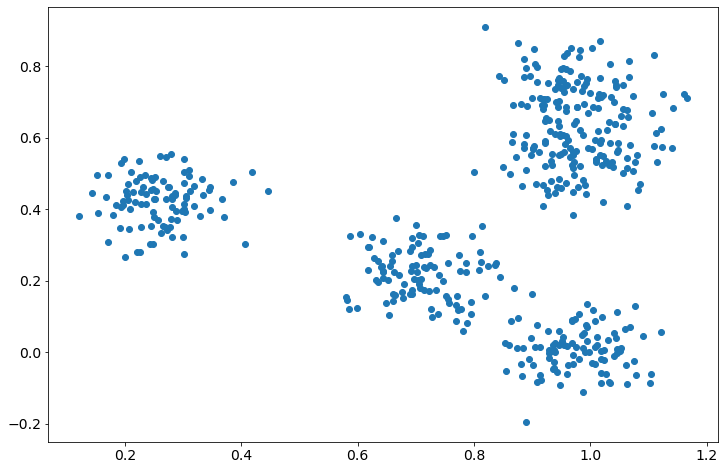

In [5]:
plt.scatter(X[:,0],X[:,1])

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Problem 1.2

**Do this!** Using the functions `sample_centroids`, `fit`, and `plot_kmeans`, experiment with different `random_state`s to see if you can observe different final centroids depending on the initial starting points. Use the data sampled above and produce two plots in the two code cells provided below; at least one of them should show a reasonabley nice $k$-means solution. 
> **Hint:** `fit` as imported from `util_hw` returns two arrays, the centroids **and** assignments.  

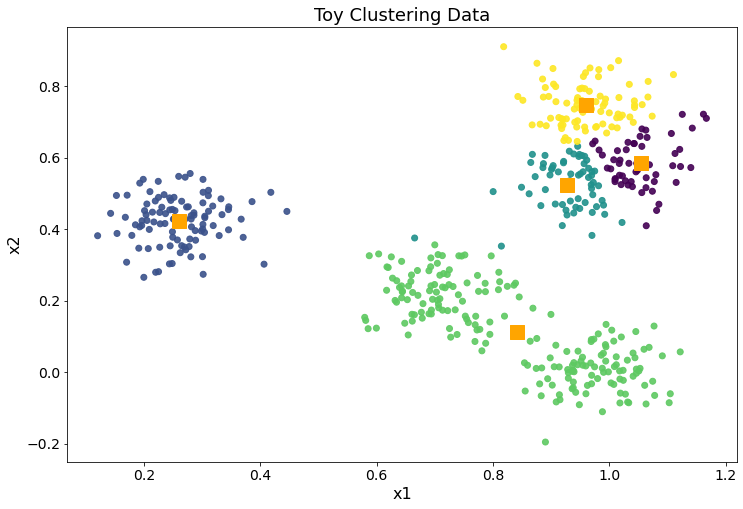

In [6]:
centroids = sample_centroids(X, 5, random_state = 10)
centroids, assignments = fit(X, 5, initial = centroids)
plot_kmeans(X, centroids = centroids, assignments = assignments)

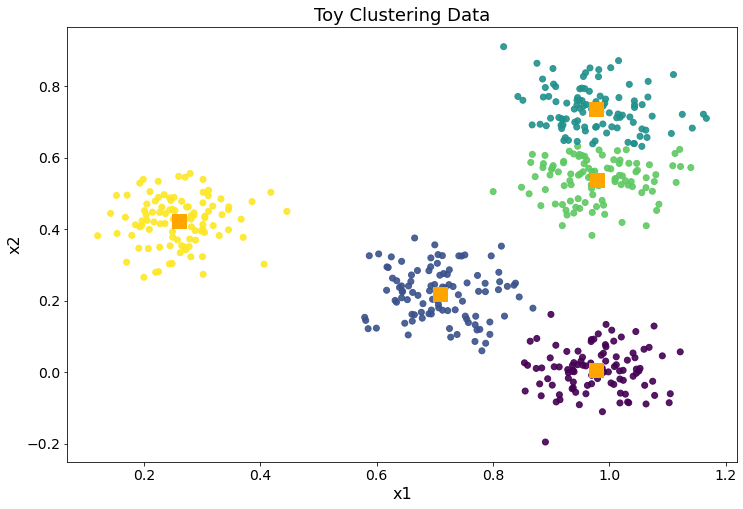

In [7]:
centroids = sample_centroids(X, 5, random_state = 1)
centroids, assignments = fit(X, 5, initial = centroids)
plot_kmeans(X, centroids = centroids, assignments = assignments)

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Problem 1.3

**Write-up!** You should have seen quite different clusterings based on different inital centroids. What might be causing this to happen? How might we better choose our initial centroids? 

_The k-means algorithm is unlikely to radically change the location of centroids from where they start, so if the clusters are far apart, the initial placement can result in differences in final assignments._

<!-- END QUESTION -->

## 2. Using `sklearn` for $k$-means 

In this section, we will explore the [$k$-means model from `sklearn`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) and discuss some of the additional features supplied by their implementation. Before we begin, it is suggested that you work through Lab 7 if you haven't already as we will assume familiarity with the terms used there.

### Looking Into the Model

Now let's create a new $k$-means model and learn about it's interface. In general, you will find that the $k$-means model from `sklearn` shares a lot of the same methods as the other models that we have looked at. However, there are some differences that are notable.

In [8]:
from sklearn.cluster import KMeans

model = KMeans(random_state = 11)

<!-- BEGIN QUESTION -->

### Problem 2.1

**Write-up!** Use the IPython `?` operator to answer the following question: how do you specify the number of clusters you would like to fit?

In [9]:
model?

_Change the n_clusters parameter._

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Problem 2.2

**Write-up!** Use the IPython `?` operator to answer the following questions: How does the model initialize centroids by default? How does it work and why is it better than randomly choosing random starting centroids?

In [10]:
model?


_It will either generate them randomly or use 'k-means++', which attempts to place the centroids far away from each other, which will help identify distinct clusters and avoid splitting the same cluster into 2 parts._

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Problem 2.3

**Write-up!** Use the IPython `?` operator to answer the following questions: How does the model decide that the centroids have converged? Why might we need to adjust this based on our input data?

In [11]:
model?

_The algorithm stops when either the max number of iterations passes, or when the change in cetroid location is less than the given tolerance. If we have input data that is very close together, we might want a lower tolerance._

<!-- END QUESTION -->

### Clustering the Toy Data with `sklearn`

Let's try using `sklearn` to cluster our data.

### Problem 3.1

**Do this!** Create and fit a _new_ `KMeans` model of our data with the default arguments except for `random_state` which should be set to 11. Be sure to store the fit centroids in `centroids` and cluster assignment indicees in `assignments` for later use.
> **Hint:** Check the scikit-learn [`kMeans` 🔗](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) documentation for how to get the centroids and assignments or use `KMeans?` and `KMeans.` + `tab`.

In [12]:
from collections import Counter

toy_model = model.fit(X, 5)
toy_assignments = toy_model.labels_
toy_centroids = toy_model.cluster_centers_
Counter(toy_assignments)

Counter({1: 63, 5: 53, 3: 84, 7: 51, 4: 52, 6: 46, 0: 51, 2: 100})

In [13]:
grader.check("q3ai")

q3ai results: All test cases passed!

<!-- BEGIN QUESTION -->

**Write-up!** How many centroids were fitted by the model? How many points were assigned to each cluster?

_8 centroids with varying numbers of points assigned to each, 1: 63, 5: 53, 3: 84, 7: 51, 4: 52, 6: 46, 0: 51, 2: 100._

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Problem 3.2

**Do this!** Create a plot showing the centroids that were produced by the model and the data points colored by their cluster assignment. Be sure to include all necessary plot components and remember that presentation matters.

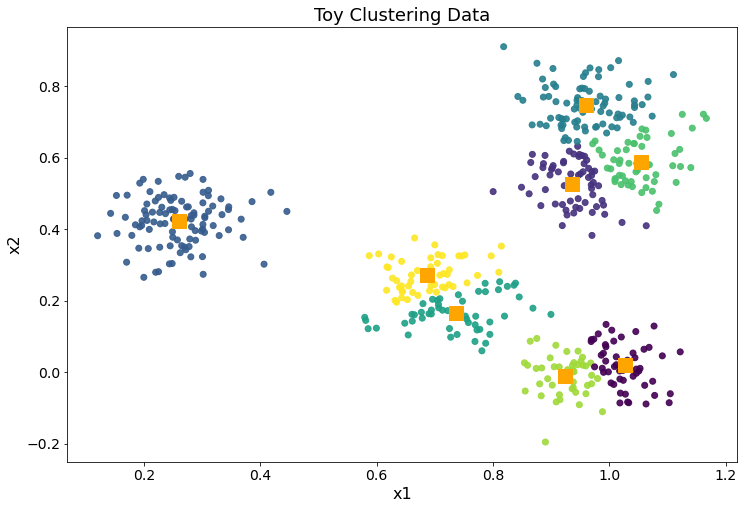

In [14]:
plot_kmeans(X, centroids = toy_centroids, assignments = toy_assignments)

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Write-up!** Given this plot, do you think this is a reasonable clustering of the data?

_Looks pretty good to me, though there may be too many clusters._

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Deciding How Many Clusters to Use
As we have seen for $k$-means, $k$ is the number of clusters/centroids that the algorithm will try to find. Choosing $k$ is an important task as it determines the output of the algorithm. Since $k$ is a parameter to our clustering algorithm, we can use a **model selection** strategy to do this.


### Problem 3.3

Consider the Sum of Squared Distances $SSD_j$ as the sum of all points in the $j$th cluster to its corresponsing cluster center $c_j$: 
$$SSD_j = \sum_{i=1}^{n} \gamma_{ij} \;d(x_i,c_j)^2,$$
where $\gamma_{ij}$ is 1 if $x_i$ belongs to cluster $j$ and 0 otherwise. 

Then, the objective function that $k$-means optimizes is the sum of the $SSD_j$ over all clusters $SSD = \sum_j SSD_j$. This means that, we want to find clusters of points that are close to one another. We can estimate how close the cluster points are to one another by measuring how far each point assigned to the cluster is from its center.

**Write-up!** Why is it difficult to find the right number of clusters for a general clustering task with d-dimensional input? Think about the value of the objective function we are optimizing with respect to the number of clusters $k$.

_Logically, if our only objective is to minimize SSD, then the conclusion would be to have one cluster per point, resulting in SSD being zero. Of course, this is not a useful clustering._

<!-- END QUESTION -->

In the cell below, we will generate a dataset with an _unknown_ number of clusters.

In [15]:
X_unknown, _ = load_toy(1000, k=-1, random_state=6)

<!-- BEGIN QUESTION -->

**Do this!** Use the elbow method described in the lecture to find a good clustering for our data. Produce a plot that shows the model performance $SSD^{(k)}$ as a function of $k \in [1, 10]$, where $SSD^{(k)} = \sum_{j=1}^k SSD_j$.  Make sure to create new models when appropriate.

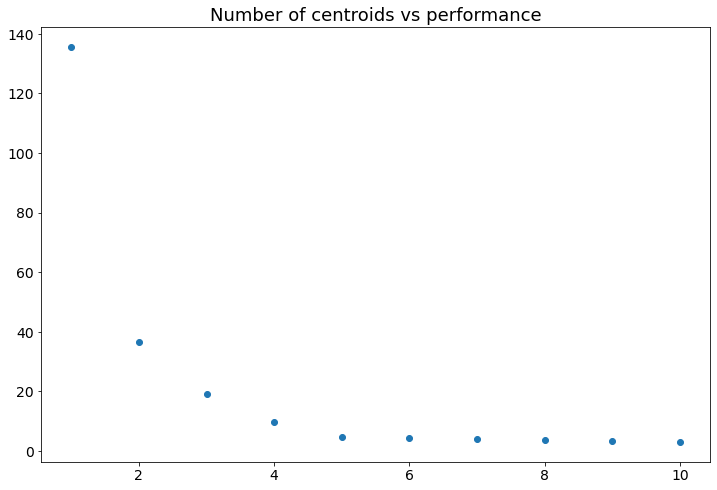

In [16]:
from utility.util_hw import squared_distance

xval = list(range(1, 11))
yval = []
SSD = 0

for x in xval:
    model = KMeans(random_state = 11, n_clusters = x)
    model.fit(X_unknown)
    assignments = model.labels_
    centroids = model.cluster_centers_
    for indice, point in enumerate(X_unknown):
        SSD = SSD + squared_distance(point, centroids[assignments[indice]])
    yval.append(SSD)
    SSD = 0

    
plt.scatter(xval, yval)
plt.title("Number of centroids vs performance")
plt.show()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Write-up!** Describe how you would choose which $k$ to use. Then, choose the appropriate $k$.

_I will choose the point on the graph where the performance measure stops dropping dramatically. In this case, it appears to be 3 or 4, I will go with 4._

<!-- END QUESTION -->

**[Optional] Try this!** In the following cell, plot the dataset to see if your choice is reasonable. 
> **Note:** This kind of visual verification/evaluation is _only_ possible for 2D input data. 

Text(0, 0.5, 'x2')

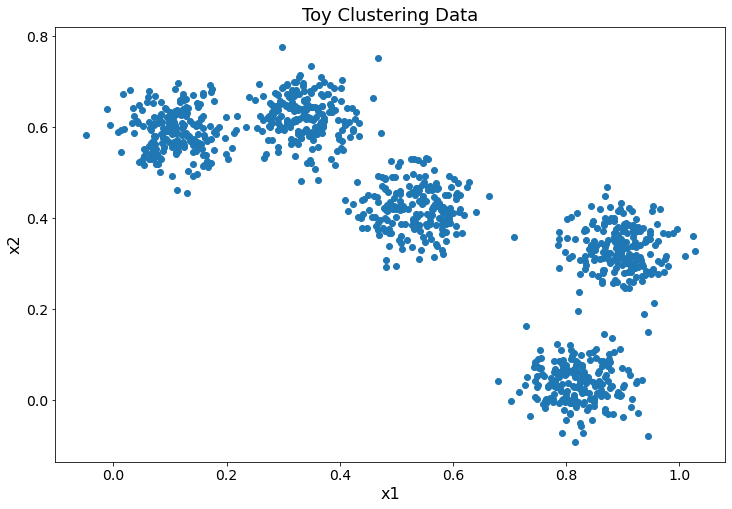

In [17]:
# This optional but useful!
# BEGIN SOLUTION
plt.scatter(X_unknown[:, 0], X_unknown[:, 1])

plt.title('Toy Clustering Data')
plt.xlabel('x1')
plt.ylabel('x2')

# END SOLUTION

## 3. Tackling Employee Attrition


A real problem that Human Resources (HR) departments in companies all over the world would like to address is employee attrition, or turnover. They would like to reduce the number of employees who leave the company as hiring new employees is expensive. In this section, we would like to see if we can make use of $k$-means to identify patterns in employee attrition so that we might suggest which areas an HR department should focus on.

To show off their Watson platform, IBM released a (fictional) [sample dataset](https://www.ibm.com/communities/analytics/watson-analytics-blog/hr-employee-attrition/) in 2015 containing employee statistics and whether or not they left the company. We'll use this dataset in our own exercise.

In [18]:
import pandas as pd

data = pd.read_csv('./utility/data/HR-Employee-Attrition.csv')

<!-- BEGIN QUESTION -->

### Problem 4.1

With our problem in mind, the next thing to do is to acquire and process our data.

**Try this!** Describe the data in `HR-Employee-Attrition.csv` (`data`), answering questions including, but not limited to, these: How many examples and features does the dataset have? What kinds of features are in the dataset? What values can these features take?
> **Hint:** Consider the steps of EDA; what would you like to know about this dataset. 

In [19]:
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


_35 features with 1470 examples, with features like how long they've worked, their age, department, worklife balance, distance from home, etc. These are integers or strings depending on the feature._

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Problem 4.2

Now that we have a feel for what our data looks like, let's do some data wrangling.

**Try this!** In the cells below (feel free to add more as you need them), explain and perform the steps that you need to prepare this data for further analysis. Make sure that your analysis and work is presented well and effectively communicates your work. In this process, consider whether each feature is informative (eg. EmployeeNumber might not be) and remove those that are not from your dataset. 
> **Hint:** You can use the `pandas.DataFrame.drop` function.

In [20]:
#First I need to drop employeecount and employeenumber since neither are useful

newdata = pd.DataFrame.drop(data, columns = ['EmployeeNumber', 'EmployeeCount'])
newdata

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,4,80,0,17,3,2,9,6,0,8


<!-- END QUESTION -->

### Problem 4.3

Another step to do in our data processing phase is to replace categorical variables that are represented as strings with an enumeration. For example, `'Attrition'` has `'Yes'` and `'No'` values that we would like to encode as `1` and `0` respectively.

**Do this!** In the following cell, [`replace`](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html) the string values in categorical variables with enumerations. Make uses of the `encoded` `DataFrame` which is a copy of `data`. 
> **Hint:** You can use the `unique` and `enumerate` functions to help you do this.

In [125]:
encoded = newdata.copy()

# for i in list(range(0, 1470)):
#     encoded.Attrition[i] = np.unique(newdata.Attrition).tolist().index(encoded.Attrition[i])

# for i in list(range(0, 1470)):
#     encoded.BusinessTravel[i] = np.unique(newdata.BusinessTravel).tolist().index(encoded.BusinessTravel[i])

# for i in list(range(0, 1470)):
#     encoded.Department[i] = np.unique(newdata.Department).tolist().index(encoded.Department[i])

# for i in list(range(0, 1470)):
#     encoded.EducationField[i] = np.unique(newdata.EducationField).tolist().index(encoded.EducationField[i])

# for i in list(range(0, 1470)):
#     encoded.Gender[i] = np.unique(newdata.Gender).tolist().index(encoded.Gender[i])
    
# for i in list(range(0, 1470)):
#     encoded.Over18[i] = np.unique(newdata.Over18).tolist().index(encoded.Over18[i])
    
# for i in list(range(0, 1470)):
#     encoded.OverTime[i] = np.unique(newdata.OverTime).tolist().index(encoded.OverTime[i])
    
# for i in list(range(0, 1470)):
#     encoded.MaritalStatus[i] = np.unique(newdata.MaritalStatus).tolist().index(encoded.MaritalStatus[i])

# for i in list(range(0, 1470)):
#     encoded.JobRole[i] = np.unique(newdata.JobRole).tolist().index(encoded.JobRole[i])

# for indice, x in enumerate(encoded.dtypes):
#     if x == 'object':
#         #print(encoded.iloc[:,[indice]])
#         encoded.iloc[:,[indice]] = encoded.iloc[:,[indice]].cat.codes

needEncoding = list(encoded.select_dtypes(include=['object']).columns)

for cat in needEncoding:
    encoded[cat] = encoded[cat].astype('category')
    encoded[cat] = encoded[cat].cat.codes.astype(np.int64)





In [126]:
encoded.columns.to_series().groupby(encoded.dtypes).groups


{int64: ['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']}

In [128]:
grader.check("q4c")

q4c results: All test cases passed!

<!-- BEGIN QUESTION -->

### Problem 4.4

Now that we have a processed dataset, let's move on to forming clusters with $k$-means. Normally, we would do some EDA here, but in the interest of time, we will forgo that part of the data science workflow. If you want to, we still encourage you to do so.

That being said, we will need to prepare an $X$ matrix of our dataset. At this point, we will drop the `'Attrition'` column from our dataset. We will also [scale our data](https://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling). 

In [129]:
from sklearn.preprocessing import scale

X_processed = scale(np.float64(encoded.copy().drop('Attrition', axis=1)))

**Do this!** In the cell below, build an elbow plot for $k \in [1, 21]$ as you did in [Problem 3.3](#Problem-3.3).

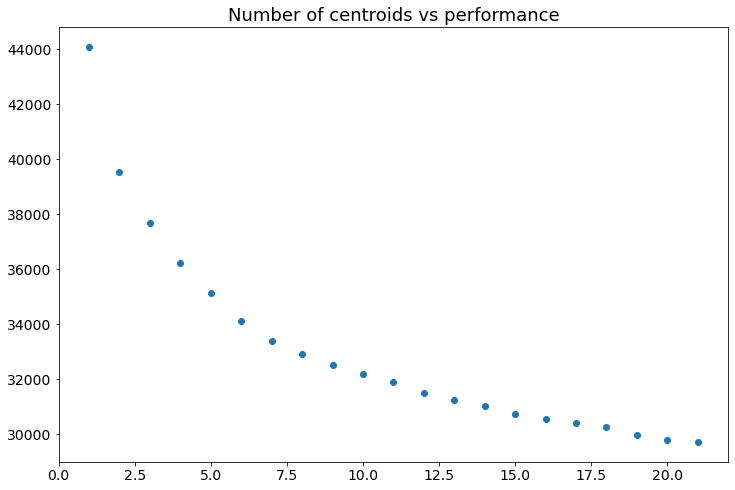

In [130]:
xval = list(range(1, 22))
yval = []
SSD = 0

for x in xval:
    model = KMeans(random_state = 11, n_clusters = x)
    model.fit(X_processed)
    assignments = model.labels_
    centroids = model.cluster_centers_
    for indice, point in enumerate(X_processed):
        SSD = SSD + squared_distance(point, centroids[assignments[indice]])
    yval.append(SSD)
    SSD = 0

    
plt.scatter(xval, yval)
plt.title("Number of centroids vs performance")
plt.show()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Write-up!** State which 𝑘 you would choose and explain why.

_I chose 8 because it was the lowest k value that still resulted in a substantial decrease in SSD._

<!-- END QUESTION -->

### Problem 4.5

**Do this!** Using the $k$ you selected in [Problem 4.4](#Problem-4.4), create and fit a new model. Remember to save the cluster assignments and centroids. Use a random state of 11.

In [131]:
k = 8
new_model = KMeans(n_clusters = k, random_state = 11)
new_model.fit(X_processed)
new_assignments = new_model.labels_
new_centroids = new_model.cluster_centers_

In [132]:
grader.check("q4e")

q4e results: All test cases passed!

### Problem 4.6

Now that we have cluster assignments from $k$-means, we need to analyze the significance of each cluster. To do that, let's return to our original DataFrame, `data`.

In the following cell, we add our cluster assignments to `data_aug`. We also compute a pivot table which provides a summary of each cluster with the within cluster `mean` for each feature.

In [133]:
data_aug = data.copy()
data_aug['Cluster'] = new_assignments
pivot = data_aug.pivot_table(index='Cluster', aggfunc=np.mean)

pivot.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Cluster,,,,,,,,,,,,,,,,,,,,,
0,46.351562,755.906250,8.781250,3.000000,1,1003.500000,2.585938,65.773438,2.617188,4.023438,...,2.929688,80,0.742188,25.468750,2.710938,2.804688,21.414062,9.609375,7.679688,9.460938
1,34.828877,800.802139,9.860963,2.802139,1,971.069519,2.641711,65.454545,2.716578,1.657754,...,2.582888,80,0.796791,8.631016,2.802139,2.754011,5.657754,3.818182,1.577540,3.754011
2,33.131313,810.232323,9.984848,2.772727,1,1053.934343,2.757576,66.818182,2.707071,1.757576,...,2.671717,80,0.611111,6.565657,2.868687,2.838384,3.297980,1.964646,0.686869,1.818182
3,36.478992,861.121849,8.852941,2.987395,1,1032.428571,2.785714,66.584034,2.756303,1.466387,...,2.697479,80,1.533613,8.126050,2.655462,2.743697,3.609244,1.995798,0.836134,2.037815
4,32.153846,753.520979,8.206294,2.755245,1,1040.164336,2.622378,67.321678,2.727273,1.304196,...,2.888112,80,0.202797,6.251748,2.842657,2.709790,3.909091,2.290210,0.870629,2.321678


**Do this!** Compute the percentage of total attrition accounted for by each cluster and store the result in `pivot['% of Attrition']`.

In [134]:
totalAtt = 2.37
percentofAtt = [0,0,0,0,0,0,0,0]
for index, row in data_aug.iterrows():
    #print(row['Cluster'], row['DailyRate'])
    if row['Attrition']=='Yes':
        percentofAtt[row['Cluster']]+=1
        

percentofAtt = [x / totalAtt for x in percentofAtt]

pivot['% of Attrition'] = percentofAtt


In [135]:
grader.check("q4f")

q4f results: All test cases passed!

<!-- BEGIN QUESTION -->

### Problem 4.7

Let's take a look at the results and identify potential areas for intervention to suggest to the HR department.

In [136]:
pivot.sort_values(by='% of Attrition', axis=0).T

Cluster,7,0,6,5,3,1,2,4
Age,49.663793,46.351562,36.705263,36.685039,36.478992,34.828877,33.131313,32.153846
DailyRate,865.913793,755.906250,802.294737,782.566929,861.121849,800.802139,810.232323,753.520979
DistanceFromHome,9.172414,8.781250,10.836842,7.803150,8.852941,9.860963,9.984848,8.206294
Education,3.163793,3.000000,2.968421,3.110236,2.987395,2.802139,2.772727,2.755245
EmployeeCount,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
EmployeeNumber,959.767241,1003.500000,1061.057895,1036.976378,1032.428571,971.069519,1053.934343,1040.164336
EnvironmentSatisfaction,2.810345,2.585938,2.868421,2.724409,2.785714,2.641711,2.757576,2.622378
HourlyRate,66.741379,65.773438,64.542105,61.929134,66.584034,65.454545,66.818182,67.321678
JobInvolvement,2.784483,2.617188,2.842105,2.637795,2.756303,2.716578,2.707071,2.727273
JobLevel,3.913793,4.023438,2.042105,2.338583,1.466387,1.657754,1.757576,1.304196


**Write-up!** Describe the clusters produced and interpret their meaning. What makes each one a separate cluster? Is there anything that stands out with respect to attrition rate? What might you suggest HR look into to improve employee retention?

_The clusters are determined by a combination of all the features of the data. Something that stands out with respect to attrition is that groups 2 and 4 have much higher rates, while group 7 has a very low rate. I would suggest looking into what's working in group 7 and try to apply that to groups 2 and 4_

<!-- END QUESTION -->



---

To double-check your work, the cell below will rerun all of the autograder tests.

In [139]:
grader.check_all()

q3ai results: All test cases passed!

q4c results: All test cases passed!

q4e results: All test cases passed!

q4f results: All test cases passed!

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [138]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False)